In [4]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [5]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

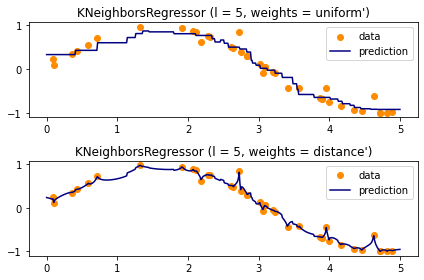

In [6]:
y[::5] += 1 * (0.5 - np.random.rand(8)) # 잡음 추가

n_neighbors = 5
for i, weights in enumerate(['uniform', 'distance']):
    #Regression based on k-nearest neighbors.
    #The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.
    # parameters:
      # n_neighbors :int, default=5 / Number of neighbors to use by default for kneighbors queries.
        #  weights :  {'uniform', 'distance'} or callable, default=’uniform’
          # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
          # ‘distance’ : weight points by the inverse of their distance. closer neighbors of a query point will have a greater influence than neighbors which are further away.
          # [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
     # leaf_size : int, default=30 / Leaf size passed to BallTree or KDTree
     # p : int, default=2 / Power parameter for the Minkowski metric
     # metric : str or callable, default=’minkowski’ / The distance metric to use for the tree
     # metric_params : dict, default=None / Additional keyword arguments for the metric function.
     # n_jobs : int, default=None / The number of parallel jobs to run for neighbors search
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

    y_ = knn.fit(X, y).predict(T)

    # 출력
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (l = %i, weights = %s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()